In [1]:
from keras.datasets import mnist
from keras.layers.core import Dense,Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from keras.optimizers import Adam,SGD
import numpy as np

Using TensorFlow backend.


In [2]:
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()          #loading data
Xtrain = Xtrain.reshape(60000, 784).astype("float32") / 255    #normalization
Xtest = Xtest.reshape(10000, 784).astype("float32") / 255
Ytrain = np_utils.to_categorical(ytrain, 10)
Ytest = np_utils.to_categorical(ytest, 10)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

11493376/11490434 [==============================] - 4s 0us/step
(60000, 784) (10000, 784) (60000, 10) (10000, 10)


In [0]:
# network and training
NB_EPOCH = 70
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD() 
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 

In [92]:
filepath="weights.hdf5"
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
lr_reduce = ReduceLROnPlateau(monitor='val_los', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:928: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` insted.
  warnings.warn('`epsilon` argument is deprecated and '


**Simple Feed Forward Network (Baseline)**

In [7]:
model=Sequential()
model.add(Dense(256,input_shape=(784,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2048,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 2048)              2099200   
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [9]:
history = model.fit(Xtrain, Ytrain,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT,callbacks=[checkpoint])

Train on 48000 samples, validate on 12000 samples
Epoch 1/70
48000/48000 [==============================] - 5s 107us/step - loss: 2.0802 - acc: 0.2908 - val_loss: 1.3622 - val_acc: 0.7209

Epoch 00001: val_loss improved from inf to 1.36215, saving model to weights.hdf5
Epoch 2/70
48000/48000 [==============================] - 4s 81us/step - loss: 1.0919 - acc: 0.6533 - val_loss: 0.5408 - val_acc: 0.8458

Epoch 00002: val_loss improved from 1.36215 to 0.54079, saving model to weights.hdf5
Epoch 3/70
48000/48000 [==============================] - 4s 81us/step - loss: 0.6846 - acc: 0.7805 - val_loss: 0.4035 - val_acc: 0.8811

Epoch 00003: val_loss improved from 0.54079 to 0.40351, saving model to weights.hdf5
Epoch 4/70
24704/48000 [==============>...............] - ETA: 1s - loss: 0.5689 - acc: 0.821448000/48000 [==============================] - 4s 81us/step - loss: 0.5460 - acc: 0.8299 - val_loss: 0.3450 - val_acc: 0.8962

Epoch 00004: val_loss improved from 0.40351 to 0.34504, saving 

42752/48000 [=========================>....] - ETA: 0s - loss: 0.1251 - acc: 0.962248000/48000 [==============================] - 4s 81us/step - loss: 0.1263 - acc: 0.9617 - val_loss: 0.1059 - val_acc: 0.9685

Epoch 00034: val_loss improved from 0.10824 to 0.10588, saving model to weights.hdf5
Epoch 35/70
48000/48000 [==============================] - 4s 81us/step - loss: 0.1224 - acc: 0.9630 - val_loss: 0.1050 - val_acc: 0.9687

Epoch 00035: val_loss improved from 0.10588 to 0.10499, saving model to weights.hdf5
Epoch 36/70
48000/48000 [==============================] - 4s 80us/step - loss: 0.1228 - acc: 0.9625 - val_loss: 0.1032 - val_acc: 0.9688

Epoch 00036: val_loss improved from 0.10499 to 0.10320, saving model to weights.hdf5
Epoch 37/70
42752/48000 [=========================>....] - ETA: 0s - loss: 0.1184 - acc: 0.964648000/48000 [==============================] - 4s 81us/step - loss: 0.1188 - acc: 0.9647 - val_loss: 0.1036 - val_acc: 0.9687

Epoch 00037: val_loss did not impro

44288/48000 [==========================>...] - ETA: 0s - loss: 0.0629 - acc: 0.980148000/48000 [==============================] - 4s 81us/step - loss: 0.0629 - acc: 0.9801 - val_loss: 0.0846 - val_acc: 0.9769

Epoch 00069: val_loss improved from 0.08475 to 0.08458, saving model to weights.hdf5
Epoch 70/70
48000/48000 [==============================] - 4s 82us/step - loss: 0.0648 - acc: 0.9800 - val_loss: 0.0857 - val_acc: 0.9763

Epoch 00070: val_loss did not improve from 0.08458


In [10]:
score = model.evaluate(Xtest, Ytest, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 85us/step
Test score: 0.07956626667785459
Test accuracy: 0.9769


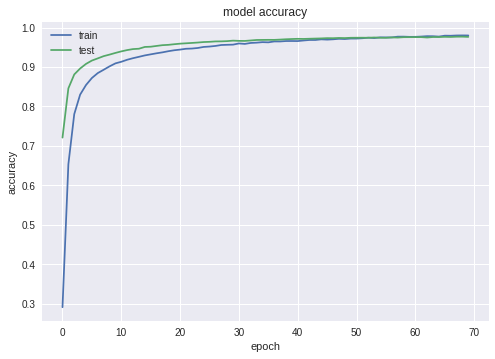

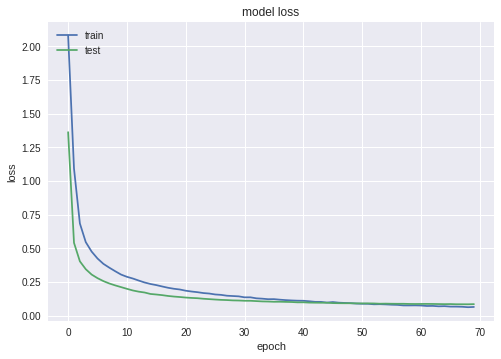

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Convolution  Network**

In [97]:
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten
model= Sequential()
model.add(Conv2D(20, kernel_size=5,padding='same',
input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(50, kernel_size=5,padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(50, kernel_size=5,padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.2))
model.add(Activation("relu"))
model.add(Dense(1024))
model.add(Dropout(0.4))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 28, 28, 20)        520       
_________________________________________________________________
activation_64 (Activation)   (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_65 (Activation)   (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 7, 7, 50)          0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 7, 7, 50)          62550     
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [0]:
(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()          #loading data
Xtrain = Xtrain.reshape(Xtrain.shape[0],28, 28,1).astype('float32')/255
Xtest = Xtest.reshape(Xtest.shape[0], 28, 28,1).astype('float32')/255
ytrain = np_utils.to_categorical(ytrain, 10)
ytest = np_utils.to_categorical(ytest, 10)



In [84]:
Xtrain.shape

(60000, 28, 28, 1)

In [99]:
history = model.fit(Xtrain, Ytrain,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT,callbacks=[checkpoint])

Train on 48000 samples, validate on 12000 samples
Epoch 1/70
48000/48000 [==============================] - 9s 179us/step - loss: 0.2363 - acc: 0.9239 - val_loss: 0.0561 - val_acc: 0.9821

Epoch 00001: val_loss improved from 0.07555 to 0.05609, saving model to weights.hdf5
Epoch 2/70
48000/48000 [==============================] - 8s 161us/step - loss: 0.0575 - acc: 0.9820 - val_loss: 0.0483 - val_acc: 0.9859

Epoch 00002: val_loss improved from 0.05609 to 0.04832, saving model to weights.hdf5
Epoch 3/70
22400/48000 [=============>................] - ETA: 3s - loss: 0.0413 - acc: 0.986948000/48000 [==============================] - 8s 161us/step - loss: 0.0399 - acc: 0.9880 - val_loss: 0.0441 - val_acc: 0.9859

Epoch 00003: val_loss improved from 0.04832 to 0.04407, saving model to weights.hdf5
Epoch 4/70
48000/48000 [==============================] - 8s 162us/step - loss: 0.0285 - acc: 0.9908 - val_loss: 0.0326 - val_acc: 0.9907

Epoch 00004: val_loss improved from 0.04407 to 0.03258, 

 2816/48000 [>.............................] - ETA: 6s - loss: 0.0042 - acc: 0.998648000/48000 [==============================] - 8s 161us/step - loss: 0.0062 - acc: 0.9985 - val_loss: 0.0460 - val_acc: 0.9928

Epoch 00038: val_loss did not improve from 0.03184
Epoch 39/70
48000/48000 [==============================] - 8s 161us/step - loss: 0.0035 - acc: 0.9991 - val_loss: 0.0534 - val_acc: 0.9918

Epoch 00039: val_loss did not improve from 0.03184
Epoch 40/70
45056/48000 [===========================>..] - ETA: 0s - loss: 0.0054 - acc: 0.998848000/48000 [==============================] - 8s 161us/step - loss: 0.0052 - acc: 0.9989 - val_loss: 0.0455 - val_acc: 0.9927

Epoch 00040: val_loss did not improve from 0.03184
Epoch 41/70
48000/48000 [==============================] - 8s 162us/step - loss: 0.0075 - acc: 0.9982 - val_loss: 0.0630 - val_acc: 0.9910

Epoch 00041: val_loss did not improve from 0.03184
Epoch 42/70
48000/48000 [==============================] - 8s 162us/step - loss: 0

In [100]:
score = model.evaluate(Xtest, Ytest, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 126us/step
Test score: 0.07942480222790975
Test accuracy: 0.9913


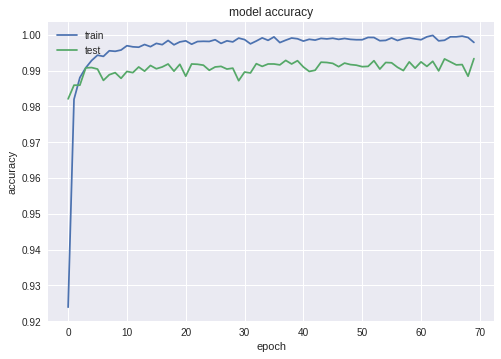

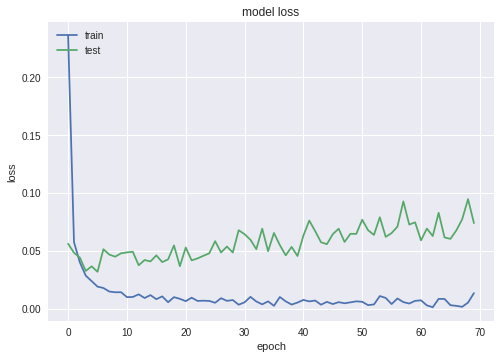

In [101]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Data Augmented Convolutional Neural Network**

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.0, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(Xtrain)

In [107]:
history = model.fit_generator(datagen.flow(Xtrain, Ytrain,batch_size=BATCH_SIZE), epochs=20,
verbose=VERBOSE, validation_data=(Xtest,Ytest),callbacks=[checkpoint])

Epoch 1/20
469/469 [==============================] - 21s 45ms/step - loss: 0.0371 - acc: 0.9899 - val_loss: 0.0279 - val_acc: 0.9939

Epoch 00001: val_loss improved from 0.02849 to 0.02791, saving model to weights.hdf5
Epoch 2/20
407/469 [=========================>....] - ETA: 2s - loss: 0.0353 - acc: 0.9909469/469 [==============================] - 22s 47ms/step - loss: 0.0354 - acc: 0.9907 - val_loss: 0.0246 - val_acc: 0.9940

Epoch 00002: val_loss improved from 0.02791 to 0.02464, saving model to weights.hdf5
Epoch 3/20
469/469 [==============================] - 22s 47ms/step - loss: 0.0314 - acc: 0.9916 - val_loss: 0.0261 - val_acc: 0.9929

Epoch 00003: val_loss did not improve from 0.02464
Epoch 4/20
 55/469 [==>...........................] - ETA: 16s - loss: 0.0282 - acc: 0.9906469/469 [==============================] - 22s 47ms/step - loss: 0.0309 - acc: 0.9914 - val_loss: 0.0237 - val_acc: 0.9938

Epoch 00004: val_loss improved from 0.02464 to 0.02370, saving model to weights.

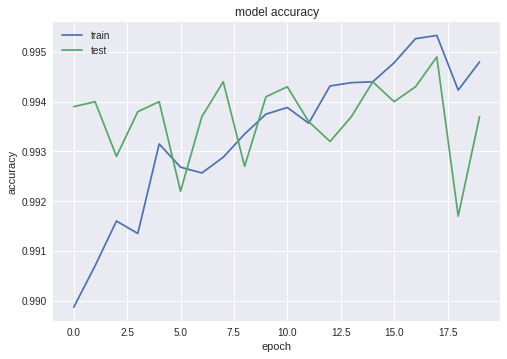

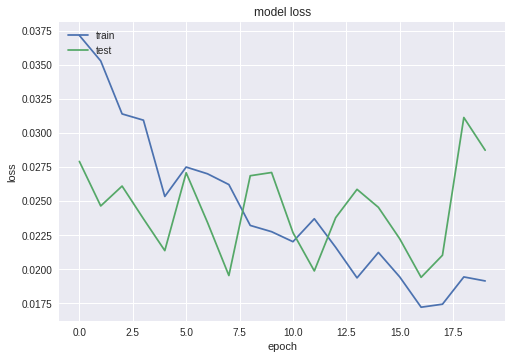

In [108]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [112]:
score = model.evaluate(Xtest, Ytest, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 138us/step
Test score: 0.028733402195702296
Test accuracy: 0.9937
